# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [4]:
X_train.shape


(50000, 32, 32, 3)

In [5]:
X_test.shape


(10000, 32, 32, 3)

In [6]:
y_train.shape


(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# Visualization

[1]


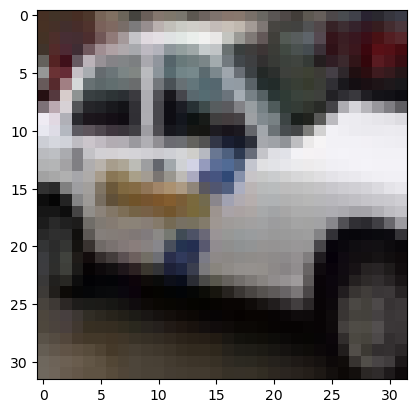

In [8]:
i=2005
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Ramachandra\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


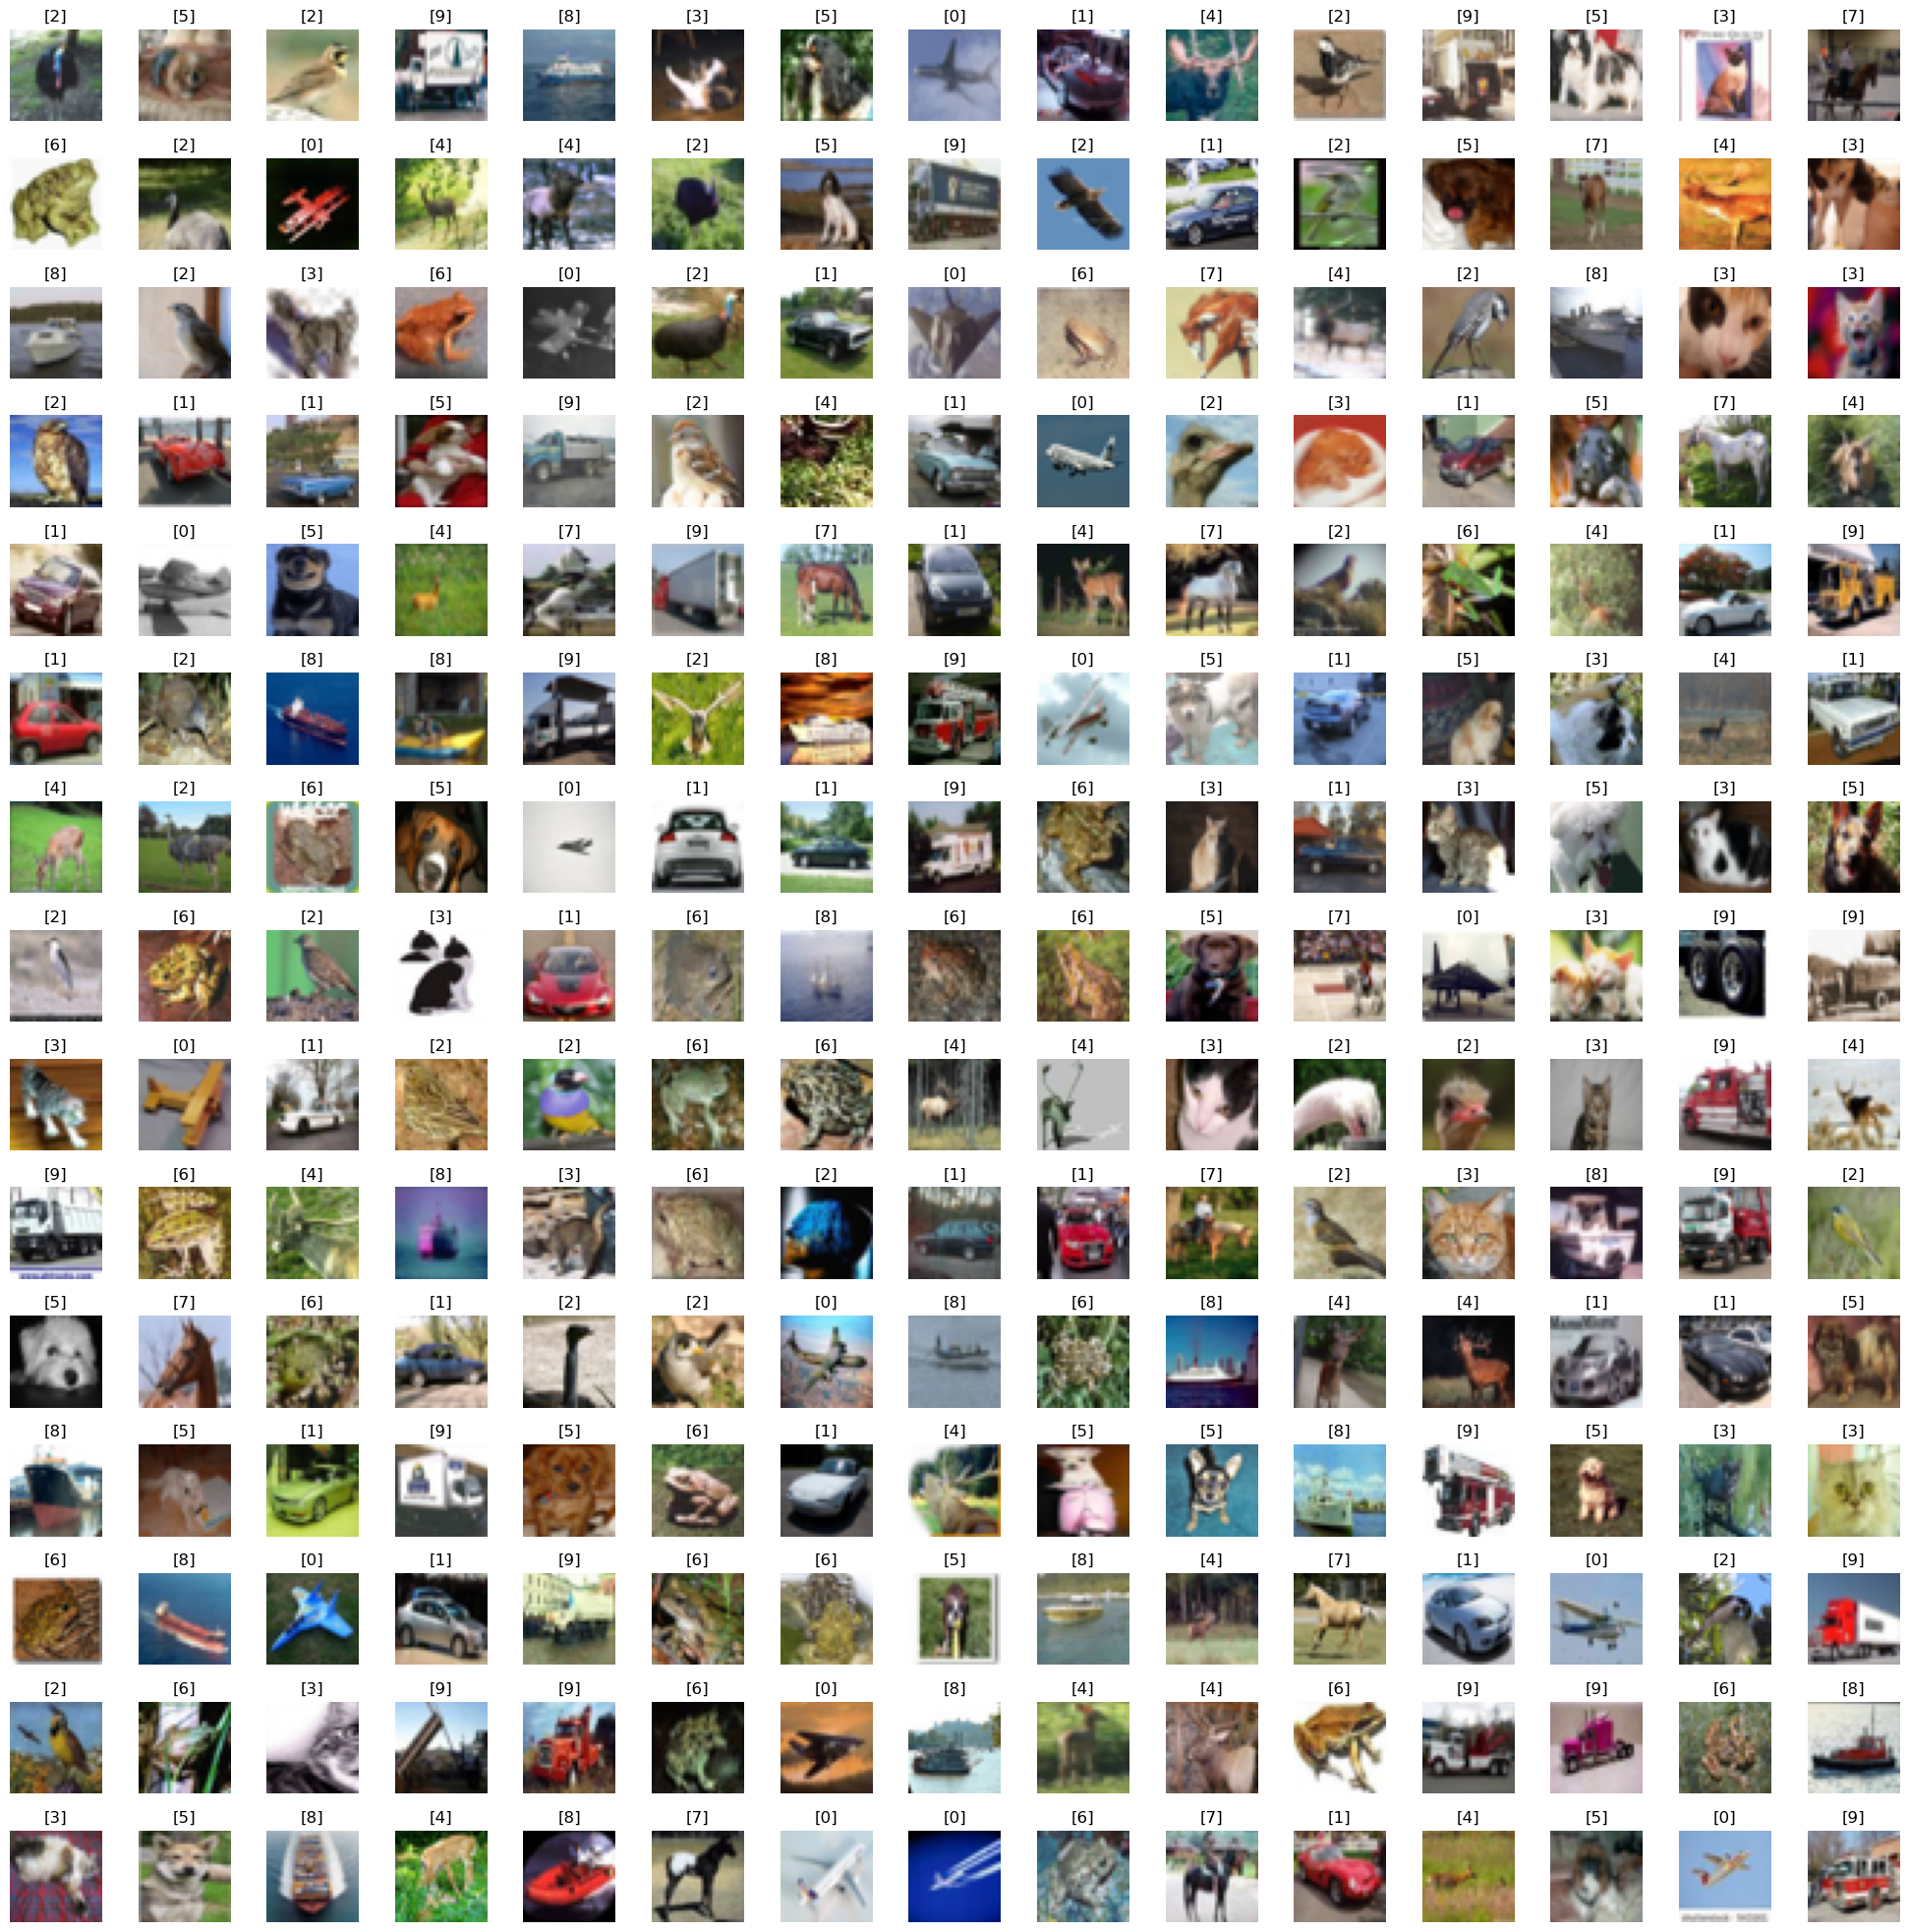

In [9]:
W_grid=15
L_grid=15
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()

n_training=len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [10]:
n_training

50000

# Data Prep

In [11]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')


In [12]:
no_category=10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
import keras
y_train=keras.utils.to_categorical(y_train,no_category)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test=keras.utils.to_categorical(y_test,no_category)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [19]:
X_train=X_train/255
X_test=X_test/255

In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
Input_shape=X_train.shape[1:]

In [23]:
Input_shape

(32, 32, 3)

# Train the model

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))
#additional layers for depth
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
#Hidden layers
cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dense(units=1024,activation='relu'))
#Output layer
# Softmax is used for multiple classification to predict the probabilities where as sigmoid is used just for binary classification 
cnn_model.add(Dense(units=10,activation='softmax'))

In [26]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [27]:
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=1,shuffle=True)

1563/1563 [==============================] - 283s 181ms/step - loss: 1.6314 - accuracy: 0.4072


# Evaluation of model

In [28]:
evaluation=cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:{}'.format(evaluation[1]))

313/313 [==============================] - 12s 38ms/step - loss: 1.2954 - accuracy: 0.5347
Test Accuracy:0.5346999764442444


In [29]:
# new command for prediction

In [30]:
predicted_classes=np.argmax(cnn_model.predict(X_test),axis=1)
predicted_classes

313/313 [==============================] - 12s 38ms/step


array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [31]:
y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_test=y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

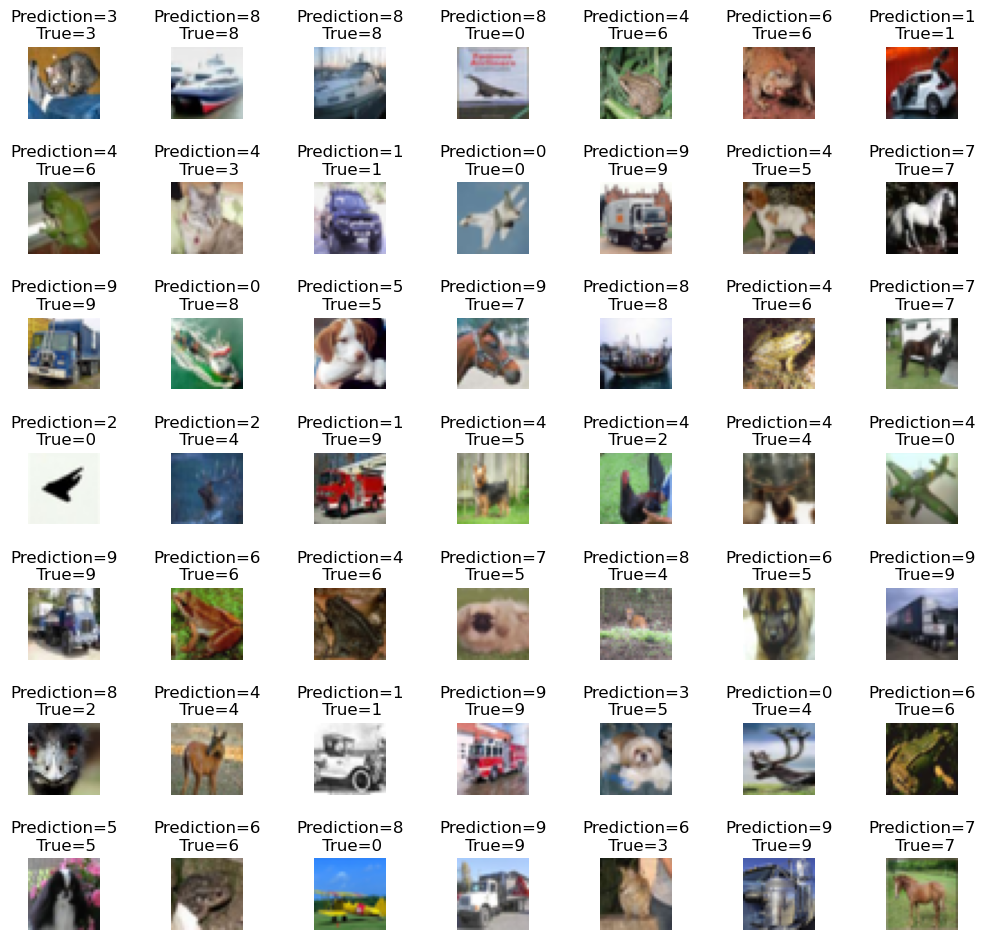

In [34]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<AxesSubplot:>

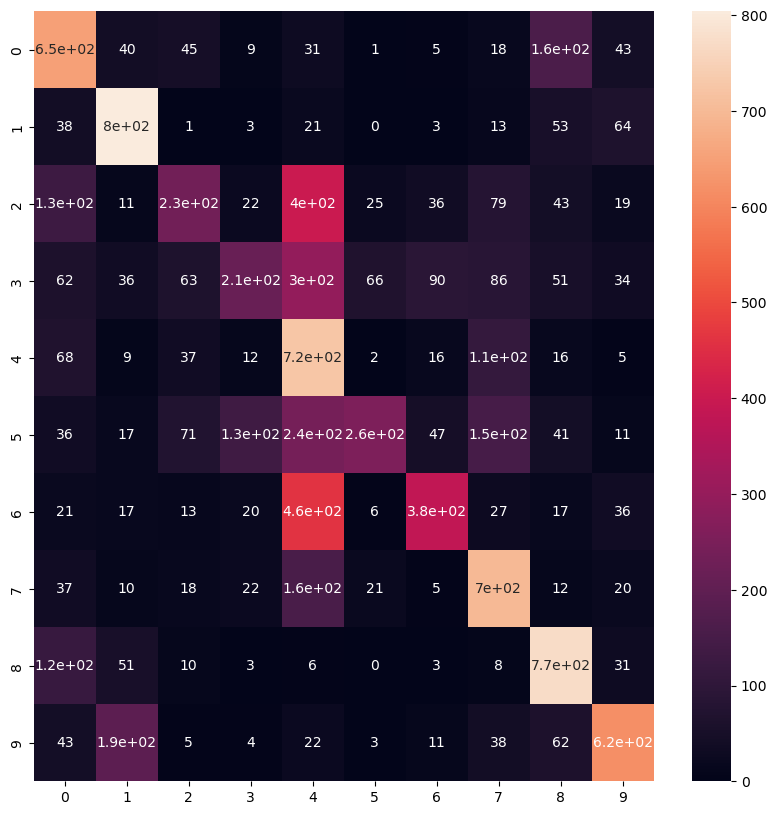

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,predicted_classes)
cm

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

# Saving the model

In [36]:
import os
directory=os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Data Augmentation

In [ ]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()


In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n=8
X_train_sample=X_train[:n]

In [ ]:
X_train_sample.shape


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train=ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

In [ ]:
from PIL import Image

fig=plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample,batch_size=n):
    for i in range(0,n):
        ax=fig.add_subplot(1,n,i+1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augmented images(rotated 90 degrees)')
    plt.show()
    break;

# Model Training using Augmented Data

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
datagen=ImageDataGenerator(rotation_range=90,width_shift_range=0.1,horizontal_flip=True,vertical_flip=True)

In [39]:
datagen.fit(X_train)

In [40]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=2)

Epoch 1/2


C:\Users\Ramachandra\AppData\Local\Temp\ipykernel_13828\1775837285.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=2)


1563/1563 [==============================] - 269s 172ms/step - loss: 1.7212 - accuracy: 0.3806
Epoch 2/2
1563/1563 [==============================] - 266s 170ms/step - loss: 1.5607 - accuracy: 0.4437


In [43]:
score=cnn_model.evaluate(X_test,y_test)
print('Test accuracy',score[1])

ValueError: in user code:

    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Ramachandra\anaconda3\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
